# Poem Generation Project

This notebook guides you through a project that generates poems by combining the style and lyrical content of different artists using an RNN and a pre-trained language model ( from open ai API). It includes text processing techniques and a Gradio interface for user inputs. Additionally, it integrates the OpenAI GPT API for enhanced language generation capabilities.  

Dataset can be found at : https://www.kaggle.com/code/paultimothymooney/poetry-generator-rnn-markov/input 




In [1]:
# Install necessary libraries
#!pip install nltk keras tensorflow gradio matplotlib seaborn wordcloud openai
#!pip install openai
#!pip install openai==0.28


In [2]:

# Import necessary libraries
import os
import re
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import openai
import gradio as gr
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Set up OpenAI API key
openai.api_key = 'XXXXXXXX' 


In [7]:
# Define the directory containing the text files
data_directory = './archive'  # Path to the archive directory


total_size = 0


# Read the text files into a dictionary
corpus = {}
files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.txt')]
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        corpus[os.path.basename(file)] = f.read()

# Display a snippet from each file and the length of texts
for file, text in corpus.items():
    print(f"File: {file}, Length: {len(text)}")
    print(text[:100] + "\n")

    # Add file size to total_size
    total_size += os.path.getsize('./archive')


    print(f"Total size of files in {data_directory}: {total_size} bytes")

    # Display the number of files
print(f"Number of files: {len(files)}")

Total size of files: 0 bytes
Number of files: 0


In [ ]:
# Define the directory containing the text files
data_directory = '.'  # Current directory

total_size = 0

# Read the text files into a dictionary
corpus = {}
files = [f for f in os.listdir(data_directory) if f.endswith('.txt')]
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        corpus[file] = f.read()

# Display a snippet from each file and the length of texts
for file, text in corpus.items():
    print(f"File: {file}, Length: {len(text)}")
    print(text[:100] + "\n")

    # Add file size to total_size
    total_size += os.path.getsize(file)

print(f"Total size of files: {total_size} bytes")

# Display the number of files
print(f"Number of files: {len(files)}")

In [4]:
# Normalize filenames 
def normalize_filename(filename):
    return os.path.basename(filename).replace('.txt', '').replace('.TXT', '')

normalized_corpus = {normalize_filename(file): text for file, text in corpus.items()}


c:\Users\MAMBL\Downloads\PROGRAMMING\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


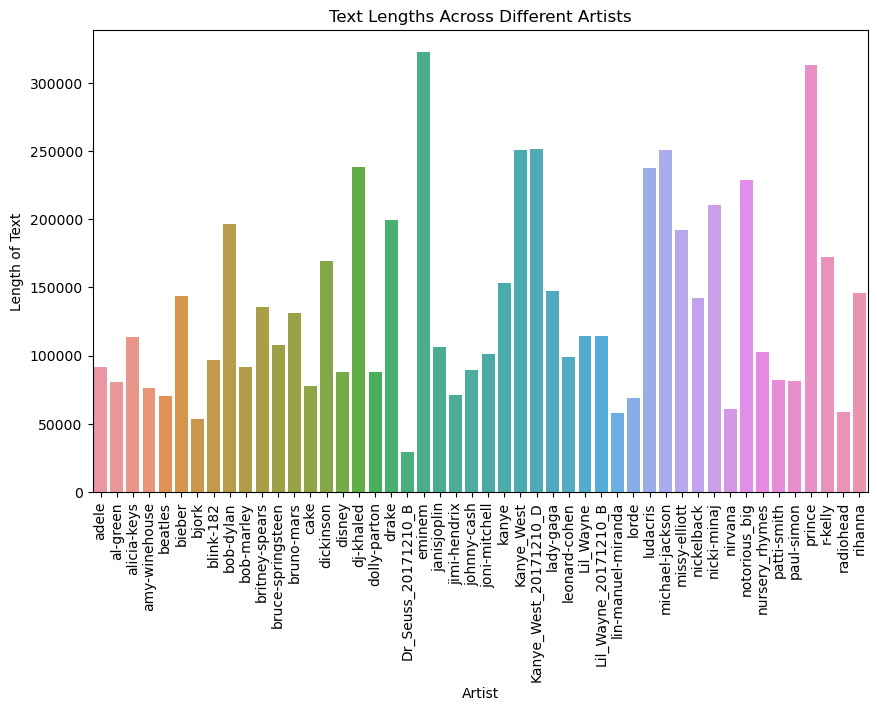

In [5]:
# Plot the distribution of text lengths across different artists
text_lengths = [len(text) for text in corpus.values()]
artist_names = [normalize_filename(file) for file in corpus.keys()]

plt.figure(figsize=(10, 6))
sns.barplot(x=artist_names, y=text_lengths)
plt.xticks(rotation=90)
plt.title('Text Lengths Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Length of Text')
plt.show()



In [6]:
# Advanced tokenization, stemming, and lemmatization
def advanced_tokenizer(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return word_tokenize(text.lower())

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def process_text(corpus):
    processed_corpus = {}
    for file, text in corpus.items():
        tokens = advanced_tokenizer(text)
        lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
        processed_corpus[file] = lemmatized
    return processed_corpus

# Process the corpus
lemmatized_corpus = process_text(corpus)

# Normalize the lemmatized corpus keys
normalized_lemmatized_corpus = {normalize_filename(file): tokens for file, tokens in lemmatized_corpus.items()}

# Print the normalized keys to confirm
print("Normalized Keys in the Lemmatized Corpus Dictionary:")
print(list(normalized_lemmatized_corpus.keys()))

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)


KeyboardInterrupt: 

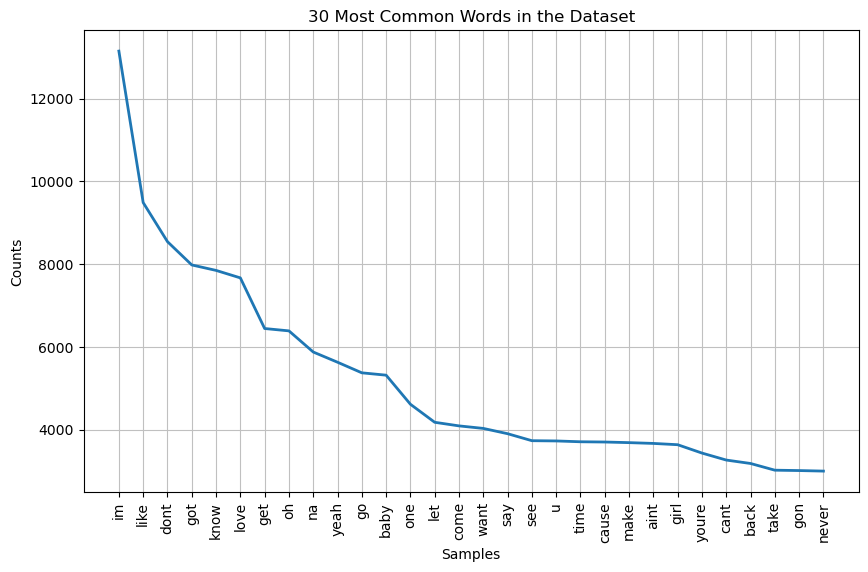

In [ ]:
# Token Frequency Distribution
all_tokens = [token for tokens in normalized_lemmatized_corpus.values() for token in tokens]
freq_dist = nltk.FreqDist(all_tokens)

# Plot the most common words
plt.figure(figsize=(10, 6))
freq_dist.plot(30, title='30 Most Common Words in the Dataset')
plt.show()

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)

**Pipeline used for the word clouds**

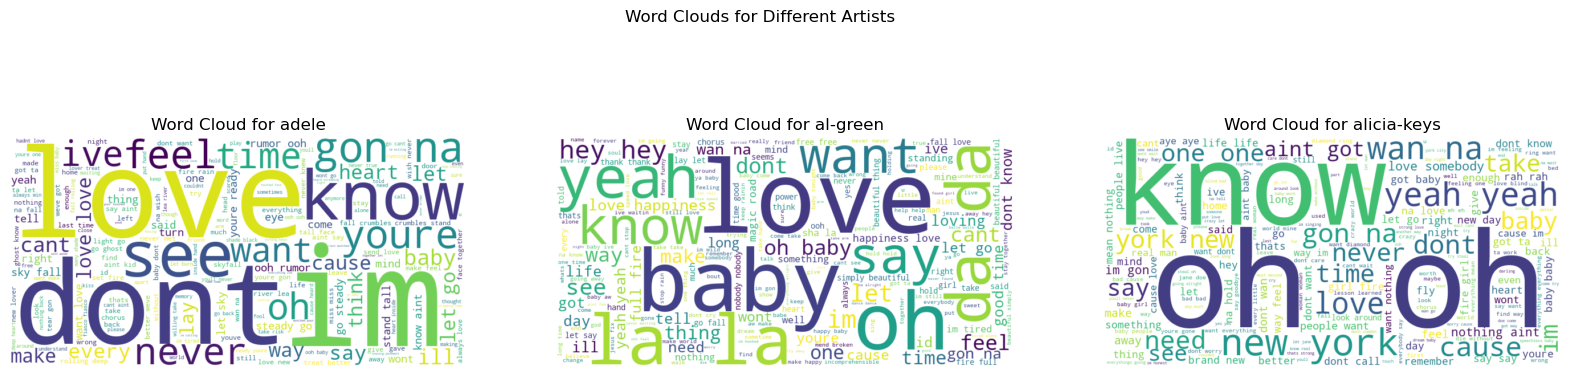

{'adele': ['looking',
  'education',
  'made',
  'way',
  'night',
  'bullshit',
  'conversation',
  'baby',
  'cant',
  'read',
  'sign',
  'wont',
  'bore',
  'detail',
  'baby',
  'dont',
  'even',
  'wan',
  'na',
  'waste',
  'time',
  'let',
  'say',
  'maybe',
  'could',
  'help',
  'ease',
  'mind',
  'aint',
  'mr',
  'right',
  'youre',
  'looking',
  'fast',
  'love',
  'thats',
  'love',
  'eye',
  'enough',
  'bad',
  'love',
  'fast',
  'love',
  'ive',
  'got',
  'mind',
  'ooh',
  'ooh',
  'ooh',
  'ooh',
  'looking',
  'affirmation',
  'made',
  'way',
  'sun',
  'friend',
  'got',
  'lady',
  'theyre',
  'baby',
  'wan',
  'na',
  'fun',
  'wont',
  'bore',
  'detail',
  'baby',
  'dont',
  'even',
  'wan',
  'na',
  'waste',
  'time',
  'let',
  'say',
  'maybe',
  'could',
  'help',
  'ease',
  'mind',
  'aint',
  'mr',
  'right',
  'youre',
  'looking',
  'fast',
  'love',
  'thats',
  'love',
  'eye',
  'enough',
  'ive',
  'bad',
  'love',
  'fast',
  'love',
  '

In [ ]:

artists = list(normalized_lemmatized_corpus.keys())

# Custom transformer for generating word clouds
class WordCloudTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, artists):
        self.artists = artists
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        fig, axs = plt.subplots(1, len(self.artists), figsize=(20, 5))
        fig.suptitle('Word Clouds for Different Artists')

        for i, artist in enumerate(self.artists):
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(X[artist]))
            axs[i].imshow(wordcloud, interpolation='bilinear')
            axs[i].set_title(f'Word Cloud for {artist}')
            axs[i].axis('off')

        plt.show()
        return X  # Return X unchanged after visualization

# Create the pipeline
wordcloud_pipeline = Pipeline([
    ('wordcloud', WordCloudTransformer(artists[:3]))  # Use only the first 3 artists for the example
])

# Apply the pipeline to the normalized lemmatized corpus
wordcloud_pipeline.fit_transform(normalized_lemmatized_corpus)

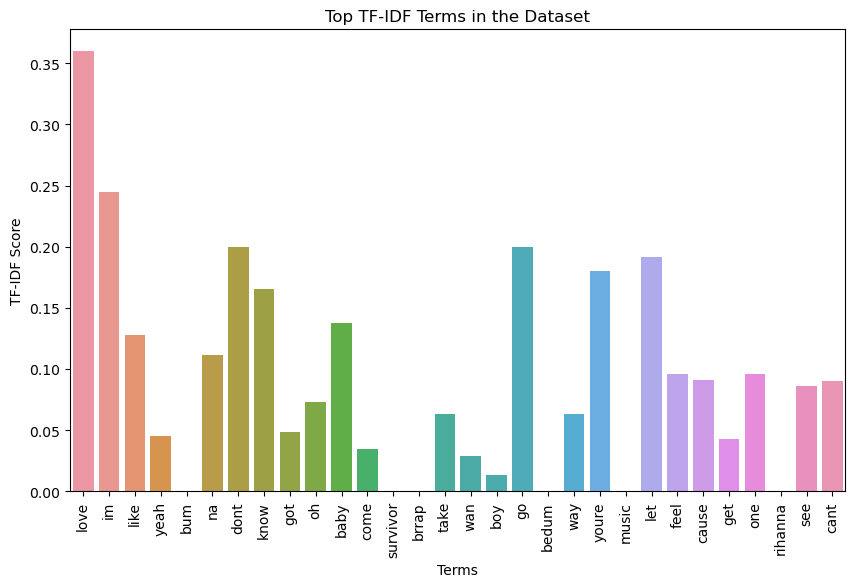

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(normalized_lemmatized_corpus[file]) for file in normalized_lemmatized_corpus])

# Plot the TF-IDF scores of the top terms
feature_array = np.array(tfidf_vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(tfidf_matrix.toarray()).flatten()[::-1]

n = 30
top_n = feature_array[tfidf_sorting][:n]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_n, y=tfidf_matrix.toarray().flatten()[tfidf_sorting][:n])
plt.xticks(rotation=90)
plt.title('Top TF-IDF Terms in the Dataset')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Score')
plt.show()



In [ ]:
from sklearn.decomposition import LatentDirichletAllocation


# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Display the topic distribution
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, 10)

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)

Topic 0:
incomprehensible janis rainin bims bim bababababa eenie meenie miney wump
Topic 1:
incomprehensible janis rainin bim bims bababababa miney eenie meenie ned
Topic 2:
incomprehensible janis rainin bim bims bababababa meenie miney eenie ned
Topic 3:
incomprehensible janis rainin bims bim bababababa miney meenie eenie wump
Topic 4:
im like dont love know got oh na get go


In [ ]:
# # Prepare sequences for the RNN model
tokenizer = Tokenizer()
seq_length = 50  # Define the sequence length for the RNN

 # Function to tokenize and prepare data
def tokenize_and_prepare(text):
     lyrics_tokens = word_tokenize(text)
     tokenizer.fit_on_texts([lyrics_tokens])
     sequences = tokenizer.texts_to_sequences([lyrics_tokens])[0]
     X, y = prepare_data(sequences, seq_length)
     return X, y

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)

In [ ]:
# Example lyrics_tokens preparation with a longer text from the corpus
lyrics_text = corpus['adele.txt'][:10000]  # Take the first 10000 characters from Adele's lyrics to ensure enough data

print(f"Length of input text: {len(lyrics_text)}")

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)

Length of input text: 10000


In [ ]:
# Tokenize and prepare data
lyrics_tokens = word_tokenize(lyrics_text)

print(f"Number of tokens: {len(lyrics_tokens)}")
print(f"First 20 tokens: {lyrics_tokens[:20]}")

tokenizer.fit_on_texts([lyrics_tokens])
sequences = tokenizer.texts_to_sequences([lyrics_tokens])[0]

print(f"Number of sequences: {len(sequences)}")
print(f"First 20 sequences: {sequences[:20]}")

#(Bird et al., 2009; Pedregosa et al., 2011)
#(OpenAI, 2024)

Number of tokens: 2392
First 20 tokens: ['Looking', 'for', 'some', 'education', 'Made', 'my', 'way', 'into', 'the', 'night', 'All', 'that', 'bullshit', 'conversation', 'Baby', ',', 'ca', "n't", 'you', 'read']
Number of sequences: 2392
First 20 sequences: [107, 27, 84, 241, 108, 16, 52, 109, 4, 85, 20, 14, 242, 243, 28, 3, 110, 8, 2, 244]


In [ ]:
def create_rnn_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(vocab_size, activation='softmax'))
    return model

#(Chollet, 2015)
#(OpenAI, 2024)

Length of input text: 10000
Number of tokens: 2392
First 20 tokens: ['Looking', 'for', 'some', 'education', 'Made', 'my', 'way', 'into', 'the', 'night', 'All', 'that', 'bullshit', 'conversation', 'Baby', ',', 'ca', "n't", 'you', 'read']
Number of sequences: 2392
First 20 sequences: [107, 27, 84, 241, 108, 16, 52, 109, 4, 85, 20, 14, 242, 243, 28, 3, 110, 8, 2, 244]
X shape: (2342, 50), y shape: (2342,)
X shape: (2342, 50), y shape: (2342,)
Epoch 1/50


c:\Users\MAMBL\Downloads\PROGRAMMING\Anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 5.8090 - val_loss: 5.2304
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 5.0719 - val_loss: 5.2632
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9593 - val_loss: 5.2840
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9928 - val_loss: 5.3006
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 5.0218 - val_loss: 5.3209
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9217 - val_loss: 5.3238
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9751 - val_loss: 5.3325
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 5.0094 - val_loss: 5.3424
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9524 - val_loss: 5.3061
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.9784 - val_loss: 5.2341
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 4.8711 - val_loss: 5.1407
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 4.8254 - val_l

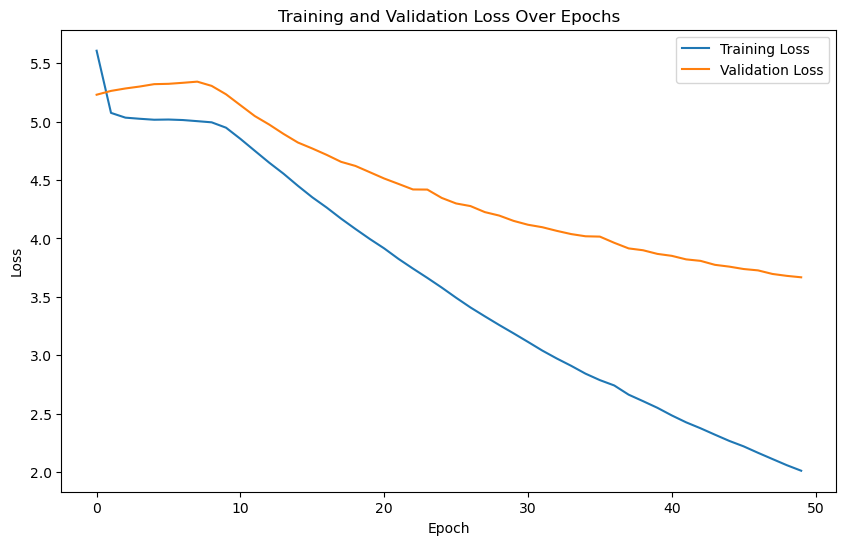

X shape: (2342, 50), y shape: (2342,)
First 5 sequences: [107, 27, 84, 241, 108]


In [ ]:
# training the model

def prepare_data(text, seq_length):
    X, y = [], []
    for i in range(0, len(text) - seq_length):
        X.append(text[i:i + seq_length])
        y.append(text[i + seq_length])
    return np.array(X), np.array(y)

# Example lyrics_tokens preparation with a longer text from the corpus
lyrics_text = corpus['adele.txt'][:10000]  # Take the first 10000 characters from Adele's lyrics to ensure enough data

print(f"Length of input text: {len(lyrics_text)}")

# Tokenize and prepare data
lyrics_tokens = word_tokenize(lyrics_text)

print(f"Number of tokens: {len(lyrics_tokens)}")
print(f"First 20 tokens: {lyrics_tokens[:20]}")

tokenizer.fit_on_texts([lyrics_tokens])
sequences = tokenizer.texts_to_sequences([lyrics_tokens])[0]

print(f"Number of sequences: {len(sequences)}")
print(f"First 20 sequences: {sequences[:20]}")

X, y = prepare_data(sequences, seq_length)

# Print the shape of X and y to ensure they are correctly prepared
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Function to train RNN model on selected lyrics
def train_model(lyrics_tokens, seq_length=50, epochs=50, batch_size=64):
    # Fit the tokenizer on the lyrics tokens
    tokenizer.fit_on_texts([lyrics_tokens])
    sequences = tokenizer.texts_to_sequences([lyrics_tokens])[0]
    
    # Prepare data for training
    X, y = prepare_data(sequences, seq_length)
    
    # Debugging: Print shapes of X and y
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    if X.size == 0 or y.size == 0:
        raise ValueError("The prepared data (X or y) is empty. Please check the tokenization and sequence preparation steps.")

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    # Define the RNN model
    vocab_size = len(tokenizer.word_index) + 1
    model = create_rnn_model(vocab_size, seq_length)

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

    # Train the model with validation data
    history = model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_val), np.array(y_val)), epochs=epochs, batch_size=batch_size)

    return model, history

# Train the model
model, history = train_model(lyrics_tokens, seq_length=50, epochs=50, batch_size=64)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Print the shape of X and y to ensure they are correctly prepared
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Check the first few sequences to ensure they are correctly prepared
print("First 5 sequences:", sequences[:5])

#(Chollet, 2015)
#(OpenAI, 2024)

In [ ]:
def generate_text(model, seed_text, num_lines, seq_length=50):
    generated_text = seed_text
    for _ in range(num_lines):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = np.array(encoded[-seq_length:])
        y_pred = model.predict(np.array([encoded]), verbose=0)
        predicted_word = tokenizer.index_word.get(np.argmax(y_pred), '')  # Get the predicted word
        seed_text += " " + predicted_word
        generated_text += "\n" + predicted_word
    return generated_text

# Example of generating text
seed_text = "This is the start of the poem"
generated_poem = generate_text(model, seed_text, num_lines=5, seq_length=seq_length)
print(generated_poem)


#(Chollet, 2015)
#(OpenAI, 2024)

This is the start of the poem
'head
and
and
i
can


In [ ]:


# Function to generate text using OpenAI GPT API with the new interface
def generate_text_gpt(seed_text, style_text, num_lines):
    prompt = f"Write a poem in the style of {style_text} using the following seed text:\n{seed_text}\n\n"    # Make prompt more spesific 
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=num_lines * 20,
        temperature=0.7    # play with temp - higher is more creative 
    )
    generated_text = response['choices'][0]['message']['content'].strip()
    return generated_text

#(OpenAI, 2024)

Play with sequence length 


In [ ]:
# Define the Gradio interface function
def gradio_interface(style_artist, lyrics_artist, seed_text, num_lines, use_gpt=False):
    try:
        # Normalize the selected artist names
        style_artist = normalize_filename(style_artist)
        lyrics_artist = normalize_filename(lyrics_artist)
        
        # Validate if the selected files exist in the normalized corpus
        if style_artist not in normalized_corpus or lyrics_artist not in normalized_lemmatized_corpus:
            return "Selected artist data not found in the corpus."

        # Get the text for the selected style artist (to define rhyme/syllable structure)
        style_text = normalized_corpus[style_artist]
        
        # Get the tokens for the selected lyrics artist (to use as the word pool)
        lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
        
        # Ensure seed_text is provided, if not, use a default from style_text
        if not seed_text.strip():
            sentences = nltk.sent_tokenize(style_text)
            seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed

        # Prepare lyrics_text for both GPT and non-GPT branches
        lyrics_text = " ".join(lyrics_tokens)

        if use_gpt:
            # Generate text using OpenAI GPT, now including lyrics_text and num_lines as arguments
                generated_text = generate_text_gpt(seed_text, style_text, num_lines)
        else:
            # Tokenize and prepare data
            X, y = tokenize_and_prepare(lyrics_text)
        
            # Train the model on the lyrics tokens with seq_length
            model, history = train_model(lyrics_tokens, seq_length=50)
        
            # Generate text based on the seed text and desired number of lines with seq_length
            generated_text = generate_text(model, seed_text, num_lines, seq_length=50)
        return generated_text

    except Exception as e:
        return f"Error: {str(e)}"
    
#(Abid et al., 2019)
#(OpenAI, 2024)


**First Run of a model that doesnt produce errors**

from here on the plan is to improve the model 

In [ ]:

# Define available artists
available_artists = [normalize_filename(file) for file in files]

# Create Gradio interface
iface = gr.Interface(
    fn=gradio_interface, 
    inputs=[
        gr.Dropdown(choices=available_artists, label="Select Style Artist (for rhyme/syllable structure)"),
        gr.Dropdown(choices=available_artists, label="Select Lyrics Artist (for word usage)"),
        gr.Textbox(lines=2, placeholder="Enter the seed text here...", label="Seed Text"),
        gr.Slider(minimum=1, maximum=20, step=1, label="Number of Lines"),
        gr.Checkbox(label="Use GPT-3 for Text Generation")
    ], 
    outputs="text",
    title="Poem Generator",
    description="Generate poems by combining the style and lyrical content of different artists. Optionally use GPT-3 for enhanced text generation."
)

# Launch the Gradio interface
iface.launch()

#(Abid et al., 2019)
#(OpenAI, 2024)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


This generator breaks when loading the code below 

Problems : Line count doesnt work well, words seem to be pulling more from the first seed artist than the second. have to use GPT-3 else it spits nonsence 

Good : Rhyming works, structure seems to work, the sentances make kind of sence

Process : What is happening is the firt seeed artist gives the rhyme and structure of the poem, and the second proveds the lyrics. Using a oepn AI API, it forms coherent sentances


Clearly dr SUess structure and rhyming. Lyrically hard to tell its bob marley 



In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# The poem to check - this is the first poem generated. I lost the orignal due to restating the kernal 
poem = """
It was too wet to play, oh what a dismay,
The rain poured down, not a sun ray.

The puddles grew big, in the yard they did lay,
No going outside, not today, no way!

But inside we gathered, all snug and warm,
With games and books, out of the storm.

We laughed and we sang, our spirits so high,
The rain couldn't dampen our fun, oh my!

So when the sun finally shows its face,
We'll go out and play, in a sunny embrace.

But for now, in our cozy hideaway,
We'll make the best of this rainy day.
"""

# Tokenize the poem
poem_tokens = word_tokenize(poem.lower())
poem_tokens = [word for word in poem_tokens if word.isalpha()]  # Remove punctuation and non-alphabetic tokens

# Use the previously processed and tokenized lyrics of Bob Marley
bob_marley_tokens = normalized_lemmatized_corpus['bob-marley']

# Check if each word in the poem exists in Bob Marley's lyrics
present_words = [word for word in poem_tokens if word in bob_marley_tokens]
missing_words = [word for word in poem_tokens if word not in bob_marley_tokens]

print("Words present in Bob Marley's lyrics:")
print(present_words)

print("\nThe following words from the poem are not present in Bob Marley's lyrics:")
print(missing_words)
#(OpenAI, 2024)


Words present in Bob Marley's lyrics:
['wet', 'play', 'oh', 'rain', 'sun', 'big', 'yard', 'lay', 'going', 'outside', 'today', 'way', 'inside', 'warm', 'storm', 'high', 'rain', 'could', 'fun', 'oh', 'sun', 'finally', 'face', 'go', 'play', 'make', 'best', 'day']

The following words from the poem are not present in Bob Marley's lyrics:
['it', 'was', 'too', 'to', 'what', 'a', 'dismay', 'the', 'poured', 'down', 'not', 'a', 'ray', 'the', 'puddles', 'grew', 'in', 'the', 'they', 'did', 'no', 'not', 'no', 'but', 'we', 'gathered', 'all', 'snug', 'and', 'with', 'games', 'and', 'books', 'out', 'of', 'the', 'we', 'laughed', 'and', 'we', 'sang', 'our', 'spirits', 'so', 'the', 'dampen', 'our', 'my', 'so', 'when', 'the', 'shows', 'its', 'we', 'out', 'and', 'in', 'a', 'sunny', 'embrace', 'but', 'for', 'now', 'in', 'our', 'cozy', 'hideaway', 'we', 'the', 'of', 'this', 'rainy']


Clearly not taking all the lyrics from bob marley. Work to be done 

**V2**

Now that i have the model and API running, I am making sure the API is reading data from the RNN model and I have decided t use Dr Seuss and Bob marley as my test. 

I also reworded the prompt to attempt to imporve the output

In [ ]:
# Set up OpenAI API key
openai.api_key = 'xxxxxxx'



template_v1 = "Here is a poem by {style_artist}:\n{style_text}\n\nUse the rhyming structure and syllables of this poem to generate a new poem using only the distribution of lyrics of another artist/poet below:\n{lyrics_text}\n\nYour poem must start with:\n{seed_text}\n"  #put the prompt 


# Function to generate text using OpenAI GPT API with the new interface
def generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines):
    template = template_v1
    prompt = template.format(style_artist=style_artist, style_text=style_text, lyrics_text=lyrics_text, seed_text=seed_text)   
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7   # play with temp - higher is more creative
    )
    generated_text = response['choices'][0]['message']['content'].strip()
    return generated_text


# Number of lines
num_lines = 20
print(f"{num_lines=}")

# Normalize the selected artist names
style_artist = normalize_filename("Dr_Seuss_20171210_B")
lyrics_artist = normalize_filename("bob-marley")
print(f"{style_artist=}")
print(f"{lyrics_artist=}")

# Get the text for the selected style artist (to define rhyme/syllable structure)
style_text = normalized_corpus[style_artist]
print(f"{style_text=}")

# Get the tokens for the selected lyrics artist (to use as the word pool)
lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
print(f"{lyrics_tokens=}")

# Ensure seed_text is provided, if not, use a default from style_text
if not seed_text.strip():
    sentences = nltk.sent_tokenize(style_text)
    seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed
print(f"{seed_text=}")

# The prompt
print("template=", template_v1.format(style_artist=style_artist, style_text=style_text, lyrics_text="lyrics_tokens", seed_text=seed_text))
# Generate text using OpenAI GPT

generated_text = generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines)
print(generated_text.replace("\\n", "\n"))

#(OpenAI, 2024)


num_lines=20
style_artist='Dr_Seuss_20171210_B'
lyrics_artist='bob-marley'
style_text='The Cat in the Hat\nBy Dr. Seuss\nThe sun did not shine.\nIt was too wet to play.\nSo we sat in the house\nAll that cold cold wet day.\nI sat there with Sally.\nWe sat there we two.\nAnd I said How I wish\nWe had something to do!\nToo wet to go out\nAnd too cold to play ball.\nSo we sat in the house.\nWe did nothing at all.\nSo all we could do was to\nSit!\nSit!\nSit!\nSit!\nAnd we did not like it.\nNot one little bit.\nBUMP!\nAnd then\nsomething went BUMP!\nHow that bump made us jump!\nWe looked!\nThen we saw him step in on the mat!\nWe looked!\nAnd we saw him!\nThe Cat in the Hat!\nAnd he said to us\nWhy do you sit there like that?\nI know it is wet\nAnd the sun is not sunny.\nBut we can have\nLots of good fun that is funny!\nI know some good games we could play\nSaid the cat.\nI know some new tricks\nSaid the Cat in the Hat.\nA lot of good tricks.\nI will show them to you.\nYour mother\nWill not m

**V3**

Now to change the hyper parameters, such as temprature, top P and adding chat completion layer

Also the lyrics dont seem to be pulling very well from bob marley. This will be addressed in a future version


In [ ]:




template_v2 = "Here is a poem by {style_artist}:\n{style_text}\n\nUse the rhyming structure and syllables of this poem to generate a new poem using only the distribution of lyrics of another artist/poet below:\n{lyrics_text}\n\nYour poem must start with:\n{seed_text}\n"  #put the prompt 


# Function to generate text using OpenAI GPT API with the new interface
def generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines):
    template = template_v2
    prompt = template.format(style_artist=style_artist, style_text=style_text, lyrics_text=lyrics_text, seed_text=seed_text)   
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,  # Temperature controls the creativity of the output. Higher values (e.g., 0.8) produce more random results.
        top_p=0.9,  # Top-p sampling chooses from the smallest set of tokens whose cumulative probability is at least top_p. It is also known as nucleus sampling.
        max_tokens=num_lines * 20,  # Controls the maximum number of tokens in the generated response.
        n=1,  # Number of responses to generate.
        stop=None  # Sequence where the API should stop generating further tokens.
    )
    return generated_text



# Number of lines
num_lines = 20
print(f"{num_lines=}")

# Normalize the selected artist names
style_artist = normalize_filename("Dr_Seuss_20171210_B")
lyrics_artist = normalize_filename("bob-marley")
print(f"{style_artist=}")
print(f"{lyrics_artist=}")

# Get the text for the selected style artist (to define rhyme/syllable structure)
style_text = normalized_corpus[style_artist]
print(f"{style_text=}")

# Get the tokens for the selected lyrics artist (to use as the word pool)
lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
print(f"{lyrics_tokens=}")

# Ensure seed_text is provided, if not, use a default from style_text
if not seed_text.strip():
    sentences = nltk.sent_tokenize(style_text)
    seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed
print(f"{seed_text=}")

# The prompt
print("template=", template_v1.format(style_artist=style_artist, style_text=style_text, lyrics_text="lyrics_tokens", seed_text=seed_text))
# Generate text using OpenAI GPT

generated_text = generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines)
print(generated_text.replace("\\n", "\n"))

#(OpenAI, 2024)

num_lines=20
style_artist='Dr_Seuss_20171210_B'
lyrics_artist='bob-marley'
style_text='The Cat in the Hat\nBy Dr. Seuss\nThe sun did not shine.\nIt was too wet to play.\nSo we sat in the house\nAll that cold cold wet day.\nI sat there with Sally.\nWe sat there we two.\nAnd I said How I wish\nWe had something to do!\nToo wet to go out\nAnd too cold to play ball.\nSo we sat in the house.\nWe did nothing at all.\nSo all we could do was to\nSit!\nSit!\nSit!\nSit!\nAnd we did not like it.\nNot one little bit.\nBUMP!\nAnd then\nsomething went BUMP!\nHow that bump made us jump!\nWe looked!\nThen we saw him step in on the mat!\nWe looked!\nAnd we saw him!\nThe Cat in the Hat!\nAnd he said to us\nWhy do you sit there like that?\nI know it is wet\nAnd the sun is not sunny.\nBut we can have\nLots of good fun that is funny!\nI know some good games we could play\nSaid the cat.\nI know some new tricks\nSaid the Cat in the Hat.\nA lot of good tricks.\nI will show them to you.\nYour mother\nWill not m

**V4**

Adjustements made to the hyper parameters and a default seed text added 

Prompt also adjusted 

In [ ]:
# Set up OpenAI API key
openai.api_key = 'xxxxxxxxxx'

# Define the template for the prompt
template_v2 = """
Here is a poem by {style_artist}:
{style_text}

Use the rhyming structure and syllables of this poem to generate a new poem using only the distribution of lyrics of another artist/poet below:
{lyrics_text}

Your poem must start with:
{seed_text}
"""  # Put the prompt

# Function to truncate text to fit within token limits
def truncate_text(text, max_tokens):
    tokens = word_tokenize(text)
    return " ".join(tokens[:max_tokens])

# Function to generate text using OpenAI GPT API with the new interface
def generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines):
    template = template_v2
    # Truncate the lyrics_text to fit within the token limit
    lyrics_text = truncate_text(lyrics_text, max_tokens=2000)  # Adjust max_tokens as necessary to fit within the limit
    
    prompt = template.format(style_artist=style_artist, style_text=style_text, lyrics_text=lyrics_text, seed_text=seed_text)
    
    # Generating text with specified hyperparameters
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,  # Temperature controls the creativity of the output. Higher values (e.g., 0.8) produce more random results.
        top_p=0.9,  # Top-p sampling chooses from the smallest set of tokens whose cumulative probability is at least top_p. It is also known as nucleus sampling.
        max_tokens=num_lines * 20,  # Controls the maximum number of tokens in the generated response.
        n=1,  # Number of responses to generate.
        stop=None  # Sequence where the API should stop generating further tokens.
    )
    generated_text = response['choices'][0]['message']['content'].strip()
    return generated_text

# Function to compare words in generated text to lyrics
def compare_generated_text_to_lyrics(generated_text, lyrics_tokens):
    # Tokenize the generated text
    generated_tokens = word_tokenize(generated_text.lower())
    generated_tokens = [word for word in generated_tokens if word.isalpha()]  # Remove punctuation and non-alphabetic tokens
    
    # Check if each word in the generated text exists in the lyrics tokens
    missing_words = [word for word in generated_tokens if word not in lyrics_tokens]
    
    return missing_words

# Number of lines
num_lines = 20
print(f"{num_lines=}")

# Normalize the selected artist names
style_artist = normalize_filename("Dr_Seuss_20171210_B")
lyrics_artist = normalize_filename("bob-marley")
print(f"{style_artist=}")
print(f"{lyrics_artist=}")

# Get the text for the selected style artist (to define rhyme/syllable structure)
style_text = normalized_corpus[style_artist]
print(f"{style_text=}")

# Get the tokens for the selected lyrics artist (to use as the word pool)
lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
lyrics_text = " ".join(lyrics_tokens)
print(f"{len(lyrics_text.split())=}")

# Ensure seed_text is provided, if not, use a default from style_text
seed_text = "This is a poem generator"  # Define the seed text
if not seed_text.strip():
    sentences = nltk.sent_tokenize(style_text)
    seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed
print(f"{seed_text=}")

# The prompt
print("template=", template_v2.format(style_artist=style_artist, style_text=style_text, lyrics_text=" ".join(lyrics_tokens[:2000]), seed_text=seed_text))

# Generate text using OpenAI GPT
generated_text = generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines)
print("Generated Text:\n", generated_text.replace("\\n", "\n"))

# Compare the generated text to the lyrics tokens
missing_words = compare_generated_text_to_lyrics(generated_text, lyrics_tokens)

if not missing_words:
    print("All words in the generated text are present in the lyrics of the specified artist.")
else:
    print("The following words from the generated text are not present in the lyrics of the specified artist:")
    print(missing_words)

#(OpenAI, 2024)


num_lines=20
style_artist='Dr_Seuss_20171210_B'
lyrics_artist='bob-marley'
style_text='The Cat in the Hat\nBy Dr. Seuss\nThe sun did not shine.\nIt was too wet to play.\nSo we sat in the house\nAll that cold cold wet day.\nI sat there with Sally.\nWe sat there we two.\nAnd I said How I wish\nWe had something to do!\nToo wet to go out\nAnd too cold to play ball.\nSo we sat in the house.\nWe did nothing at all.\nSo all we could do was to\nSit!\nSit!\nSit!\nSit!\nAnd we did not like it.\nNot one little bit.\nBUMP!\nAnd then\nsomething went BUMP!\nHow that bump made us jump!\nWe looked!\nThen we saw him step in on the mat!\nWe looked!\nAnd we saw him!\nThe Cat in the Hat!\nAnd he said to us\nWhy do you sit there like that?\nI know it is wet\nAnd the sun is not sunny.\nBut we can have\nLots of good fun that is funny!\nI know some good games we could play\nSaid the cat.\nI know some new tricks\nSaid the Cat in the Hat.\nA lot of good tricks.\nI will show them to you.\nYour mother\nWill not m

**Generated Text:**  
*This is a poem generator*  
*Using lyrical data from an innovator*  
*Mixing rhymes from different creators*  
*To create new verses, like a translator*  

*Don't worry about a thing*  
*Let the melody make your heart sing*  
*From Bob Marley to MC Lyte*  
*Their words blend in just right*  

*Jammin' and buffalo soldiers*  
*Mixing with the words of MC Lyte's folders*  
*Creating a unique blend of lines*  
*In this generator, creativity shines*  

*Every little thing is gonna be alright*  
*As the verses come to light*  
*Through the distribution of lyrics*  
*New poetry appears, no gimmicks*  

*So let the words flow and intertwine*  
*In this poem generator, all is fine*  
*From reggae vibes to hip-hop beats*  
*A fusion of artistry, a creative feat*    



I had to save this poem because incase I lost it when re running the code


**Finally some bob marley sounding lyrics** 




**V5 - FINAL**

Now that the generator is working. I am going to reintroduce the ability to select artists and re introduce gradio as a user interface and slight adjusent to the prompt and creativy temprature level


In [ ]:
# Set up OpenAI API key
openai.api_key = 'xxxxxxxxxxxxxxxxxxx'

# Define the template for the prompt
template_v2 = """
Here is a poem by {style_artist}:
{style_text}

Use the rhyming structure and syllables of this poem to generate a new poem using only the distribution of lyrics and phrases of another artist/poet below:
{lyrics_text}

Your poem must start with:
{seed_text}
"""  # Put the prompt

# Function to truncate text to fit within token limits
def truncate_text(text, max_tokens):
    tokens = word_tokenize(text)
    return " ".join(tokens[:max_tokens])

# Function to generate text using OpenAI GPT API with the new interface
def generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines):
    template = template_v2
    # Truncate the style_text and lyrics_text to fit within the token limit
    style_text = truncate_text(style_text, max_tokens=500)  # Adjust max_tokens as necessary
    lyrics_text = truncate_text(lyrics_text, max_tokens=1500)  # Adjust max_tokens as necessary
    
    prompt = template.format(style_artist=style_artist, style_text=style_text, lyrics_text=lyrics_text, seed_text=seed_text)
    
    # Generating text with specified hyperparameters
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.6,  # Temperature controls the creativity of the output. Higher values (e.g., 0.8) produce more random results.
        top_p=0.9,  # Top-p sampling chooses from the smallest set of tokens whose cumulative probability is at least top_p. It is also known as nucleus sampling.
        max_tokens=num_lines * 20,  # Controls the maximum number of tokens in the generated response.
        n=1,  # Number of responses to generate.
        stop=None  # Sequence where the API should stop generating further tokens.
    )
    generated_text = response['choices'][0]['message']['content'].strip()
    return generated_text


# Function to compare words in generated text to lyrics
def compare_generated_text_to_lyrics(generated_text, lyrics_tokens):
    # Tokenize the generated text
    generated_tokens = word_tokenize(generated_text.lower())
    generated_tokens = [word for word in generated_tokens if word.isalpha()]  # Remove punctuation and non-alphabetic tokens
    
    # Check if each word in the generated text exists in the lyrics tokens
    missing_words = [word for word in generated_tokens if word not in lyrics_tokens]
    
    return missing_words

# Number of lines
num_lines = 20
print(f"{num_lines=}")

# Normalize the selected artist names
style_artist = normalize_filename(style_artist)
lyrics_artist = normalize_filename(lyrics_artist)
print(f"{style_artist=}")
print(f"{lyrics_artist=}")

# Get the text for the selected style artist (to define rhyme/syllable structure)
style_text = normalized_corpus[style_artist]
print(f"{style_text=}")

# Get the tokens for the selected lyrics artist (to use as the word pool)
lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
lyrics_text = " ".join(lyrics_tokens)
print(f"{len(lyrics_text.split())=}")

# Ensure seed_text is provided, if not, use a default from style_text
seed_text = "This is a poem generator"  # Define the seed text
if not seed_text.strip():
    sentences = nltk.sent_tokenize(style_text)
    seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed
print(f"{seed_text=}")

# The prompt
print("template=", template_v2.format(style_artist=style_artist, style_text=style_text, lyrics_text=" ".join(lyrics_tokens[:2000]), seed_text=seed_text))

# Generate text using OpenAI GPT
generated_text = generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines)
print("Generated Text:\n", generated_text.replace("\\n", "\n"))

# Compare the generated text to the lyrics tokens
missing_words = compare_generated_text_to_lyrics(generated_text, lyrics_tokens)

if not missing_words:
    print("All words in the generated text are present in the lyrics of the specified artist.")
else:
    print("The following words from the generated text are not present in the lyrics of the specified artist:")
    print(missing_words)


#(OpenAI, 2024)


num_lines=20
style_artist='Dr_Seuss_20171210_B'
lyrics_artist='bob-marley'
style_text='The Cat in the Hat\nBy Dr. Seuss\nThe sun did not shine.\nIt was too wet to play.\nSo we sat in the house\nAll that cold cold wet day.\nI sat there with Sally.\nWe sat there we two.\nAnd I said How I wish\nWe had something to do!\nToo wet to go out\nAnd too cold to play ball.\nSo we sat in the house.\nWe did nothing at all.\nSo all we could do was to\nSit!\nSit!\nSit!\nSit!\nAnd we did not like it.\nNot one little bit.\nBUMP!\nAnd then\nsomething went BUMP!\nHow that bump made us jump!\nWe looked!\nThen we saw him step in on the mat!\nWe looked!\nAnd we saw him!\nThe Cat in the Hat!\nAnd he said to us\nWhy do you sit there like that?\nI know it is wet\nAnd the sun is not sunny.\nBut we can have\nLots of good fun that is funny!\nI know some good games we could play\nSaid the cat.\nI know some new tricks\nSaid the Cat in the Hat.\nA lot of good tricks.\nI will show them to you.\nYour mother\nWill not m

Creating the new gradio interface

In [ ]:
# Define the Gradio interface function
def gradio_interface(style_artist, lyrics_artist, seed_text, num_lines):
    try:
        # Normalize the selected artist names
        style_artist = normalize_filename(style_artist)
        lyrics_artist = normalize_filename(lyrics_artist)
        
        # Validate if the selected files exist in the normalized corpus
        if style_artist not in normalized_corpus or lyrics_artist not in normalized_lemmatized_corpus:
            return "Selected artist data not found in the corpus."

        # Get the text for the selected style artist (to define rhyme/syllable structure)
        style_text = normalized_corpus[style_artist]
        
        # Get the tokens for the selected lyrics artist (to use as the word pool)
        lyrics_tokens = normalized_lemmatized_corpus[lyrics_artist]
        lyrics_text = " ".join(lyrics_tokens)
        
        # Ensure seed_text is provided, if not, use a default from style_text
        if not seed_text.strip():
            sentences = nltk.sent_tokenize(style_text)
            seed_text = random.choice(sentences[:50])  # Choose a random sentence as seed
        
        # Generate text using OpenAI GPT
        generated_text = generate_text_gpt(seed_text, style_artist, style_text, lyrics_text, num_lines)
        
        return generated_text
    except Exception as e:
        return f"Error: {str(e)}"

# Define available artists
available_artists = [normalize_filename(file) for file in files]

# Create Gradio interface
iface = gr.Interface(
    fn=gradio_interface, 
    inputs=[
        gr.Dropdown(choices=available_artists, label="Select Style Artist (for rhyme/syllable structure)"),
        gr.Dropdown(choices=available_artists, label="Select Lyrics Artist (for word usage)"),
        gr.Textbox(lines=2, placeholder="Enter the seed text here...", label="Seed Text"),
        gr.Slider(minimum=1, maximum=20, step=1, label="Number of Lines")
    ], 
    outputs="text",
    title="Poem Generator",
    description="Generate poems by combining the style and lyrical content of different artists."
)

# Launch the Gradio interface
iface.launch()

#(Abid et al., 2019)
#(OpenAI, 2024)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


the reason I choose to use Dr Seuse as the style most of the time is becuase his rythmic and flow is unique and easily recognisable even with new lyrics 

I didnt manage to get the number of lines slider to work accuratly. it does make the poem longer/shorter but is not an accurate representation of number of lines 